# Plots for evaluation

In [40]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

from ptinsight.common.latency import calculate_latencies
from ptinsight.common.plotting import Plotter, add_relative_time

plotter = Plotter("paper", "../images", "tight")
axis_margin = 0.02

58405979
675.9951273148148
minute_start    2020-06-02 13:07:46+00:00
count                               67350
Name: 156, dtype: object


'lmroman7-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


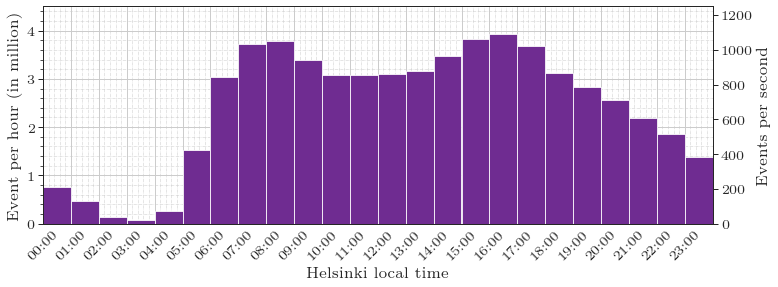

In [80]:
def plot_hsl_daily_event_volume():
    data = pd.read_csv(f"data/daily_event_volume.csv")
    data["minute_start"] = pd.to_datetime(data["minute_start"], utc=True, unit="s")
    
#     data = data.tail(600)
#     data = data.reset_index(drop=True)
    print(data["count"].sum())
    print(data["count"].mean()/60)
    print(data.iloc[data["count"].idxmax()])
    
    time_idx = pd.DatetimeIndex(data["minute_start"]).tz_convert('Europe/Helsinki')
    by_hour = data.groupby(time_idx.hour)["count"].sum()
    hours = range(len(by_hour))
    
    fig, axs = plotter.make_subplots()
    ax = axs[0]
    
    ax2 = ax.twinx()
    ax2.set_ylabel("Events per second")

    ax.bar(hours, by_hour / 1e6, width=1, align="edge")
    ax.set_ylabel("Event per hour (in million)")
    ax.set_xlabel("Helsinki local time")
    ax.set_xlim([0, 24])
    ax.set_xticks(hours)
    ax.set_xticklabels([f"{h:02d}:00" for h in hours], rotation=45, ha="center", va="center_baseline")
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_ylim([0, 4.5])
    
    ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax2.set_yticks([0, 200, 400, 600, 800, 1000, 1200])
    ax2.set_ylim([0, 4.5e6/3600])

    ax.grid(b=True, which="major", linewidth=1.0)
    ax.grid(b=True, which="minor", linewidth=0.5, linestyle="-.")
    
    plotter.save("hsl_daily_event_volume")

plot_hsl_daily_event_volume()

'lmroman7-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


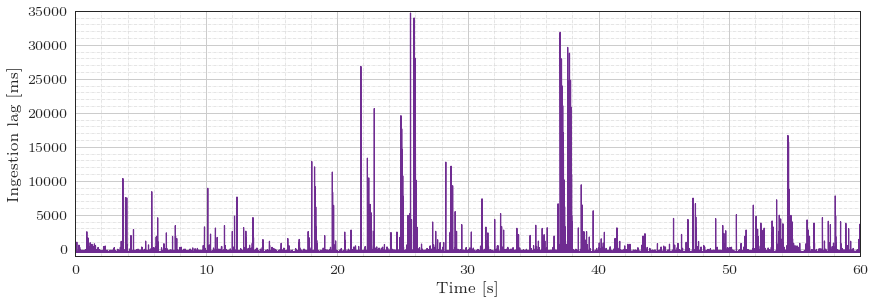

In [81]:
def plot_timelag_over_time():
    data = pd.read_csv(f"data/ingestion_lag.csv")
    data["time_lag"] = data["ingestion_timestamp"] - data["event_timestamp"]
    add_relative_time(data, "ingestion_timestamp")
    
    fig, axs = plotter.make_subplots()
    ax = axs[0]

    ax.plot(data["t"], data["time_lag"])
#     ax.plot(data["ingestion_timestamp"] - data["ingestion_timestamp"][0], data["event_timestamp"] - data["event_timestamp"][0])

    ax.set_xlim([0, 60])
    ax.set_ylim([-1e3, 35000])
    ax.set_ylabel("Ingestion lag [ms]")
    ax.set_xlabel("Time [s]")

    plotter.format(fig)
    plotter.save(f"hsl_ingestion_lag")
    
plot_timelag_over_time()

0.00     -541.938965
0.01     -518.180342
0.02     -510.150830
0.03     -507.726768
0.04     -506.078447
0.05     -504.489258
0.06     -503.582910
0.07     -502.510010
0.08     -501.696455
0.09     -500.849365
0.10     -499.757275
0.11     -498.766660
0.12     -497.877187
0.13     -497.041484
0.14     -496.284707
0.15     -495.574756
0.16     -494.936738
0.17     -494.289141
0.18     -493.616787
0.19     -492.942227
0.20     -492.145117
0.21     -491.422754
0.22     -490.647480
0.23     -489.851045
0.24     -489.025146
0.25     -488.209961
0.26     -487.434854
0.27     -486.680039
0.28     -485.896934
0.29     -485.149229
0.30     -484.470752
0.31     -483.705820
0.32     -482.992881
0.33     -482.341846
0.34     -481.554551
0.35     -480.920313
0.36     -480.138691
0.37     -479.400928
0.38     -478.593330
0.39     -477.665459
0.40     -476.799219
0.41     -475.824912
0.42     -474.934990
0.43     -473.863330
0.44     -472.837314
0.45     -471.674072
0.46     -470.316045
0.47     -469

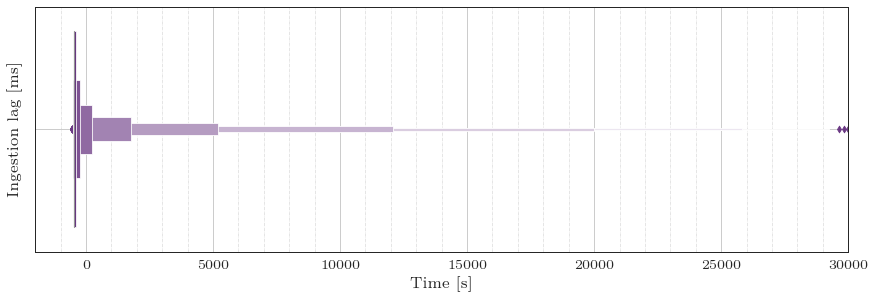

In [85]:
def plot_timelag_distribution():
    data = pd.read_csv(f"data/ingestion_lag.csv")
    data["time_lag"] = data["ingestion_timestamp"] - data["event_timestamp"]
    add_relative_time(data, "ingestion_timestamp")
    data = data[data["t"] <= 60]
    
    fig, axs = plotter.make_subplots()
    ax = axs[0]

    with pd.option_context('display.max_rows', None):
        print(data["time_lag"].quantile([x/100 for x in range(101)]))
    sb.boxenplot(data["time_lag"], scale="exponential")
#     ax.plot(data["ingestion_timestamp"] - data["ingestion_timestamp"][0], data["event_timestamp"] - data["event_timestamp"][0])

    ax.set_xlim([-2000, 30000])
#     ax.set_ylim([-1e3, 1000])
    ax.set_ylabel("Ingestion lag [ms]")
    ax.set_xlabel("Time [s]")

    plotter.format(fig)
#     plotter.save(f"time_lag")
    
plot_timelag_distribution()